In [12]:
import pandas as pd 
import numpy as np
import re
import string

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

from sklearn.metrics import confusion_matrix

### Data Facts and Import 

In [13]:
df_train = pd.read_csv('Dataset/SentimentAnalysisofTweetsthroughAltmetrics/train.csv')
df_test = pd.read_csv('Dataset/SentimentAnalysisofTweetsthroughAltmetrics/test.csv')

In [14]:
df_train.columns = ["Text", "Label"]
df_test.columns = ["Text", "Label"]

In [15]:
# remove the neutural.
# df_train= df_train[df_train['Label'] != 0]
# df_test= df_test[df_test['Label'] != 0]

In [16]:
df_train.shape

(732, 2)

In [17]:
df_train.head()

,Text,Label
0,good acronym copper nanotubes Definitely,-1
1,Author Michael Walz Wilhelm,0
2,GlycemicIndex diet restricted energy effective...,1
3,higher fibre intake partic cereal fibre reduce...,1
4,next life going research copper nanotubes CuNTs,-1


In [18]:
df_test.head()

,Text,Label
0,Yeah paper ebirdf,1
1,Nutrients Free Full Text,0
2,platform Bioinformatics paper advanced access ...,1
3,Regional distribution styrene analogues genera...,0
4,Duan naturally award Best Science Acronym year,-1


In [19]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    732 non-null    object
 1   Label   732 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.6+ KB


In [20]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    314 non-null    object
 1   Label   314 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.0+ KB


In [21]:
df_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Label,732.0,0.019126,0.801616,-1.0,-1.0,0.0,1.0,1.0


In [22]:
df_test.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Label,314.0,0.009554,0.8013,-1.0,-1.0,0.0,1.0,1.0


In [23]:
temp = df_train.groupby('Label').count()['Text'].reset_index().sort_values(by='Text',ascending=False)
temp.style.background_gradient(cmap='Purples')

,Label,Text
1,0,262
2,1,242
0,-1,228


In [24]:
temp = df_test.groupby('Label').count()['Text'].reset_index().sort_values(by='Text',ascending=False)
temp.style.background_gradient(cmap='Purples')

,Label,Text
1,0,113
2,1,102
0,-1,99


In [50]:
#train

x = ['Neutral', 'Positive', 'Negative']
y = [262, 242, 228]

# Use the hovertext kw argument for hover text
fig = go.Figure(data=[go.Bar(x=x, y=y,
            hovertext=['40% of tweets', '31% of tweets', '29% of tweets'])])

# Customize aspect
#marker_color='rgb(158,202,225)'
fig.update_traces(marker_line_color='midnightblue',
                  marker_line_width=1.)
fig.update_layout(title_text='Distribution of sentiment')
fig.show()

In [51]:
#test

x = ['Neutral', 'Positive', 'Negative']
y = [113, 102, 99]

# Use the hovertext kw argument for hover text
fig = go.Figure(data=[go.Bar(x=x, y=y,
            hovertext=['40% of tweets', '31% of tweets', '29% of tweets'])])

# Customize aspect
#marker_color='rgb(158,202,225)'
fig.update_traces(marker_line_color='midnightblue',
                  marker_line_width=1.)
fig.update_layout(title_text='Distribution of sentiment')
fig.show()

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='Label', ylabel='count'>

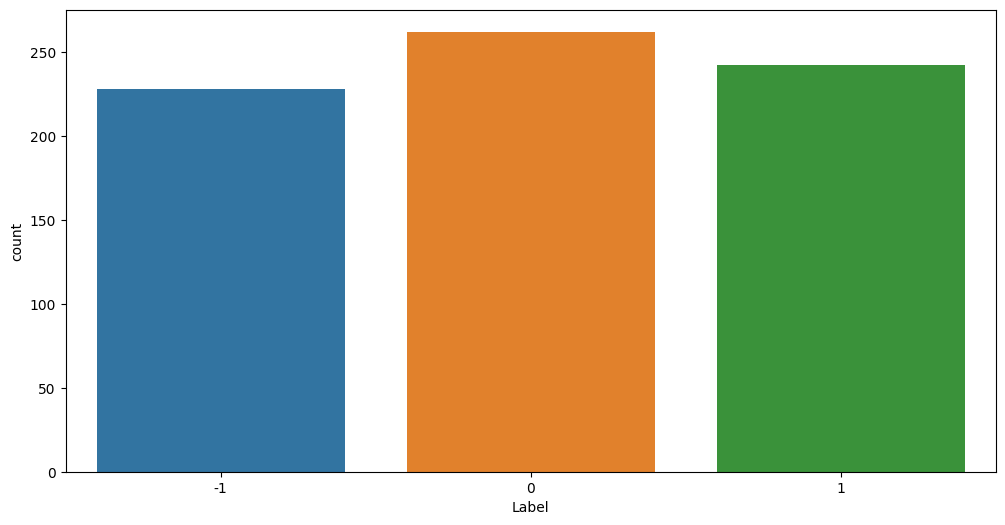

In [26]:
plt.figure(figsize=(12,6))
sns.countplot(x='Label',data=df_train)

<AxesSubplot:xlabel='Label', ylabel='count'>

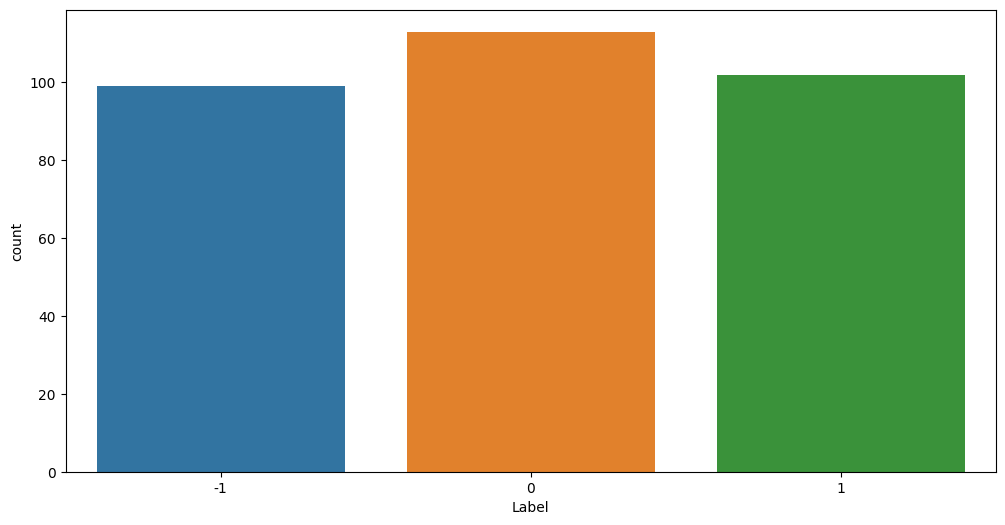

In [27]:
plt.figure(figsize=(12,6))
sns.countplot(x='Label',data=df_test)

In [28]:
!pip install plotly
!pip install nbformat

In [29]:
from plotly import graph_objects as go

In [30]:
#tain
temp = df_train.groupby('Label').count()['Text'].reset_index().sort_values(by='Text',ascending=False)
temp.style.background_gradient(cmap='Purples')


fig = go.Figure(go.Funnelarea(
    text =temp.Label,
    values = temp.Text,
    title = {"position": "top center", "text": "Train Data - Funnel-Chart of Sentiment Distribution"}
    ))
fig.show()

In [31]:
#test

temp = df_test.groupby('Label').count()['Text'].reset_index().sort_values(by='Text',ascending=False)
temp.style.background_gradient(cmap='Purples')


fig = go.Figure(go.Funnelarea(
    text =temp.Label,
    values = temp.Text,
    title = {"position": "top center", "text": "Test Data - Funnel-Chart of Sentiment Distribution"}
    ))
fig.show()

In [32]:
!pip install nltk
!pip install wordcloud

!pip install ipykernel
!pip install --upgrade nbformat

#restart your kernal

In [33]:
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
#nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asif.raza\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


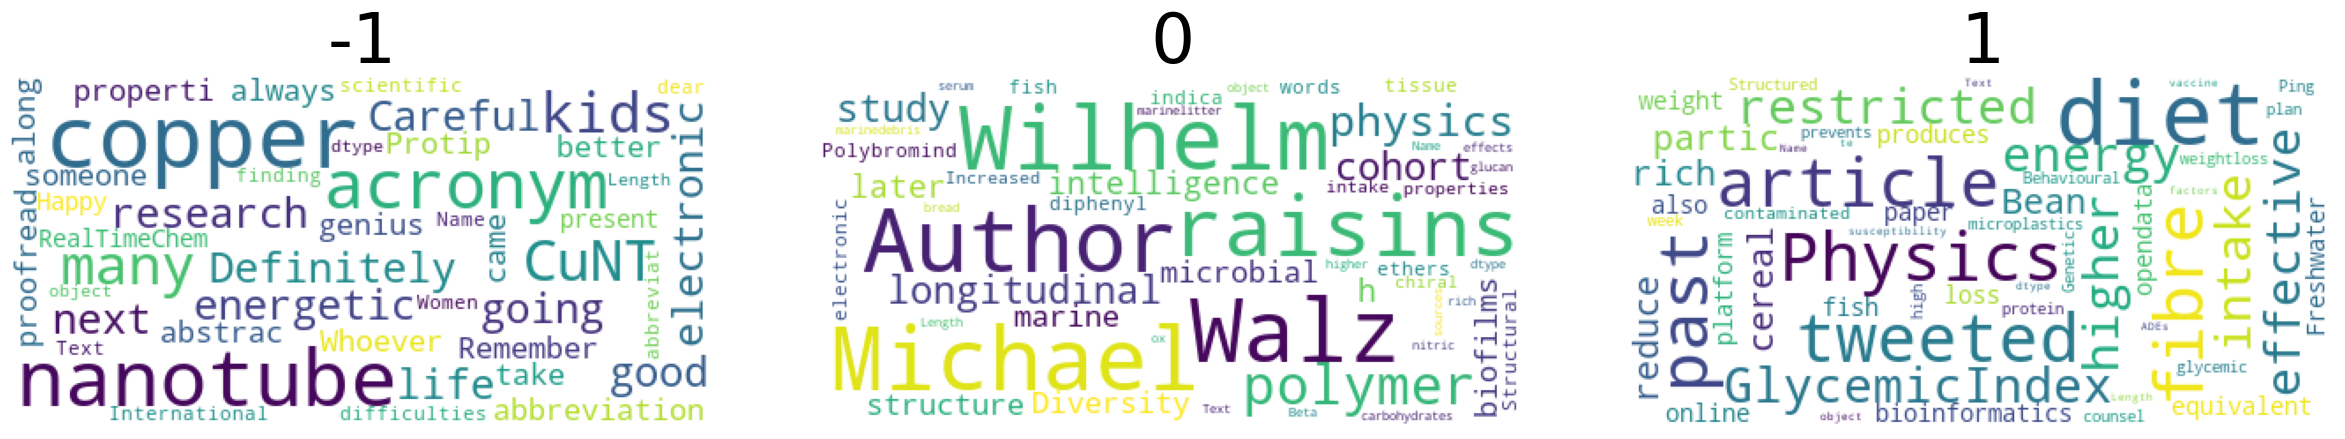

In [34]:
#train

def get_wordcloud(text):
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords=stopwords.words('english')).generate(str(text))
    
    return wordcloud

emotions = df_train["Label"].unique()

figure, axes = plt.subplots(ncols=3, nrows=1,figsize=(30,25))
plt.axis('off')

# for each emotion
for emotion, ax in zip(emotions, axes.flat):
    wordcloud = get_wordcloud(df_train[df_train["Label"]==emotion]['Text'])
    ax.imshow(wordcloud)
    ax.title.set_text(emotion)
    ax.title.set_size(50)
    
    ax.axis('off')
    
plt.subplots_adjust(wspace=0.15, hspace=0.05)

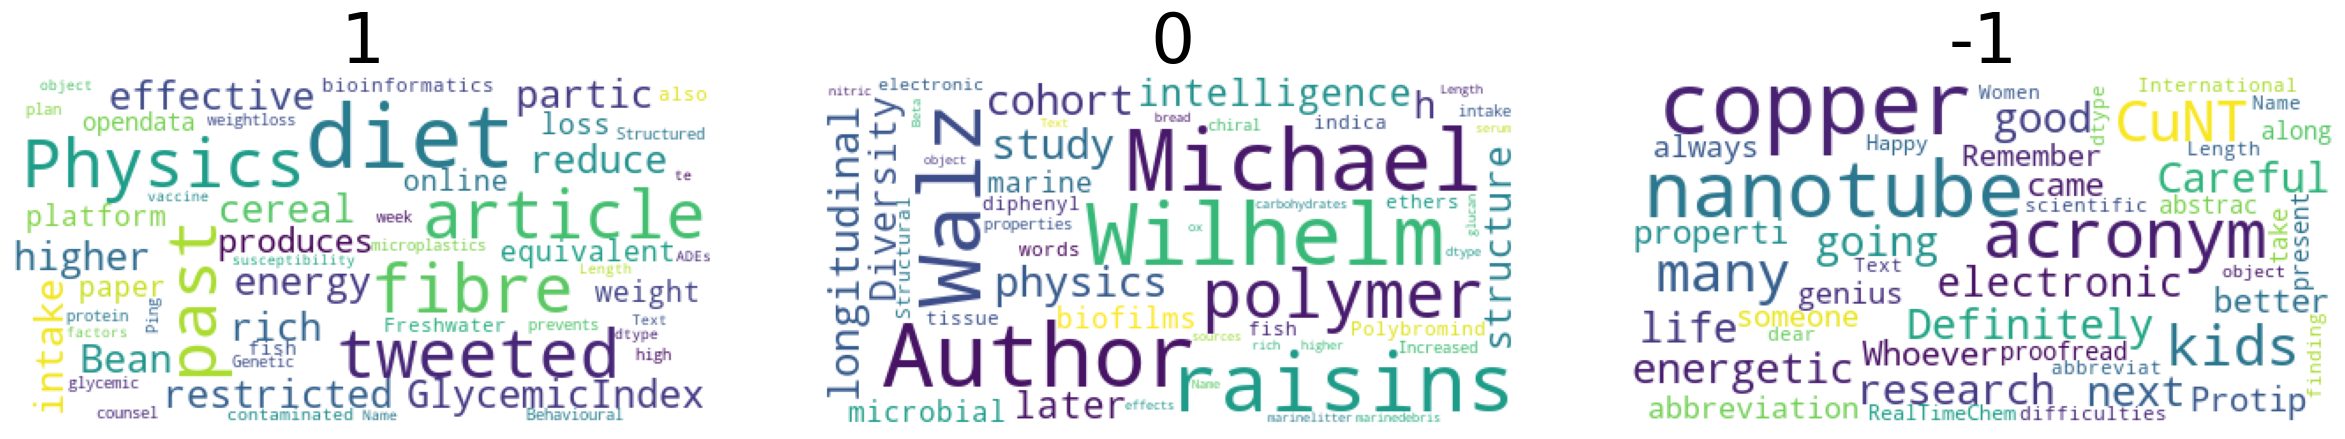

In [35]:
#test

def get_wordcloud(text):
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords=stopwords.words('english')).generate(str(text))
    
    return wordcloud

emotions = df_test["Label"].unique()

figure, axes = plt.subplots(ncols=3, nrows=1,figsize=(30,25))
plt.axis('off')

# for each emotion
for emotion, ax in zip(emotions, axes.flat):
    wordcloud = get_wordcloud(df_train[df_train["Label"]==emotion]['Text'])
    ax.imshow(wordcloud)
    ax.title.set_text(emotion)
    ax.title.set_size(50)
    
    ax.axis('off')
    
plt.subplots_adjust(wspace=0.15, hspace=0.05)

<AxesSubplot:ylabel='Label'>

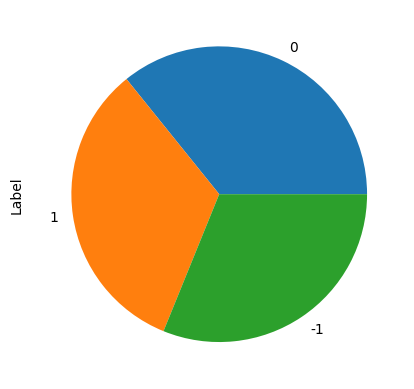

In [36]:
#train

df_train['Label'].value_counts().plot(kind='pie')

<AxesSubplot:ylabel='Label'>

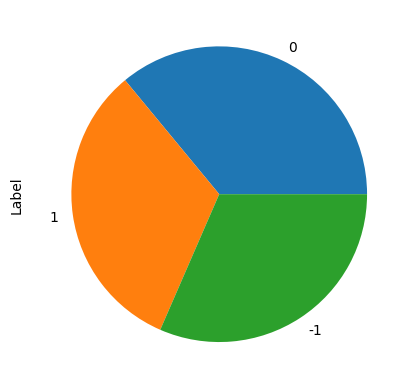

In [37]:
#test

df_test['Label'].value_counts().plot(kind='pie')

In [38]:
import plotly.express as px

In [39]:
#train

positive_text = df_train["Text"][df_train["Label"]==1].apply(lambda x : x.split())
negative_text = df_train["Text"][df_train["Label"]=="negative"].apply(lambda x: x.split())
neutral_text = df_train["Text"][df_train["Label"]=="neutral"].apply(lambda x:x.split())


# Merge all the lists into one common list
positive_text = sum(positive_text, [])
negative_text = sum(negative_text, [])
neutral_text = sum(neutral_text, [])

# Plot the most common words in positive sentiment
freq_pos = nltk.FreqDist(positive_text)
pos_df = pd.DataFrame({
    "words":list(freq_pos.keys()),
    "Count":list(freq_pos.values())
})
common_pos = pos_df.nlargest(columns="Count", n=30)
fig = px.bar(common_pos, x="words", y="Count", labels={"words": "Words", "Count":"Frequency"})
fig.show();

In [40]:
#test

positive_text = df_test["Text"][df_train["Label"]==1].apply(lambda x : x.split())
negative_text = df_test["Text"][df_train["Label"]=="negative"].apply(lambda x: x.split())
neutral_text = df_test["Text"][df_train["Label"]=="neutral"].apply(lambda x:x.split())


# Merge all the lists into one common list
positive_text = sum(positive_text, [])
negative_text = sum(negative_text, [])
neutral_text = sum(neutral_text, [])

# Plot the most common words in positive sentiment
freq_pos = nltk.FreqDist(positive_text)
pos_df = pd.DataFrame({
    "words":list(freq_pos.keys()),
    "Count":list(freq_pos.values())
})
common_pos = pos_df.nlargest(columns="Count", n=30)
fig = px.bar(common_pos, x="words", y="Count", labels={"words": "Words", "Count":"Frequency"})
fig.show();

### Distribution of tweet length

In [41]:
df_train['Text_len'] = df_train['Text'].astype(str).apply(len)
df_train['Text_word_count'] = df_train['Text'].apply(lambda x: len(str(x).split()))

In [42]:
df_train.head(3)

,Text,Label,Text_len,Text_word_count
0,good acronym copper nanotubes Definitely,-1,40,5
1,Author Michael Walz Wilhelm,0,27,4
2,GlycemicIndex diet restricted energy effective...,1,96,10


In [43]:
neutral = df_train[df_train['Label'] == 0]
positive = df_train[df_train['Label'] == 1]
negative = df_train[df_train['Label'] == -1]

x1 = neutral['Text_len']
x2 = positive['Text_len']
x3 = negative['Text_len']

fig = go.Figure(data=[go.Histogram(x=x1,
                                   marker_line_width=1, 
                                   marker_line_color="midnightblue", 
                                   xbins_size = 5, 
                                   opacity = 0.5)])

fig.update_layout(title_text='Distribution of neutral tweet lengths')
fig.show()

fig = go.Figure(data=[go.Histogram(x=x2,
                                   marker_line_width=1, 
                                   marker_color='rgb(50,202,50)', 
                                   xbins_size = 5, 
                                   marker_line_color="midnightblue", 
                                   opacity = 0.5)])

fig.update_layout(title_text='Distribution of positive tweet lengths')
fig.show()

fig = go.Figure(data=[go.Histogram(x=x3,
                                   marker_line_width=1, 
                                   marker_color='crimson', 
                                   xbins_size = 5, 
                                   marker_line_color="midnightblue", 
                                   opacity = 0.5)])

fig.update_layout(title_text='Distribution of negative tweet lengths')
fig.show()

